In [100]:
#improting the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [101]:
df=pd.read_csv('winequality_red.csv')

In [102]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [103]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

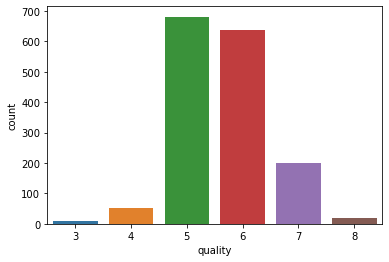

In [104]:
sns.countplot(x='quality',data=df)

In [105]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


data consists of nummeric values

In [107]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There are no null values present in the dataset

In [108]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [168]:
df.describe()

,fixed acidity,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,0.087467,15.874922,46.467792,0.996747,0.658149,10.422983,0.135710
std,1.741096,0.179060,0.194801,0.047065,10.460157,32.895324,0.001887,0.169507,1.065668,0.342587
min,4.600000,0.120000,0.000000,0.012000,1.000000,6.000000,0.990070,0.330000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,0.070000,7.000000,22.000000,0.995600,0.550000,9.500000,0.000000
50%,7.900000,0.520000,0.260000,0.079000,14.000000,38.000000,0.996750,0.620000,10.200000,0.000000
75%,9.200000,0.640000,0.420000,0.090000,21.000000,62.000000,0.997835,0.730000,11.100000,0.000000
max,15.900000,1.580000,1.000000,0.611000,72.000000,289.000000,1.003690,2.000000,14.900000,1.000000


From the above summary we can see that outliers are present in most of the feature and it is positively skewed.

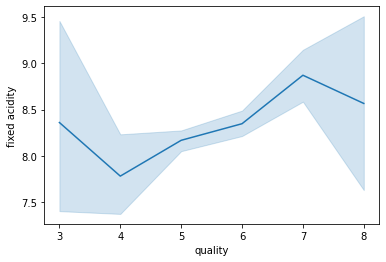

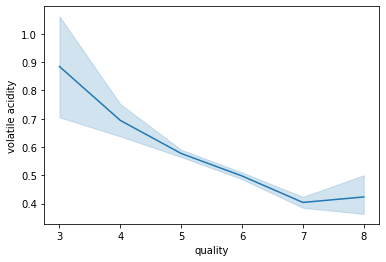

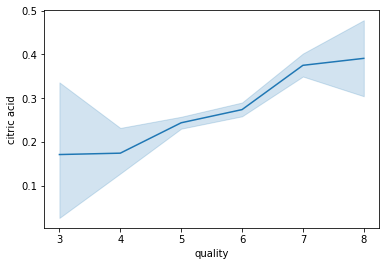

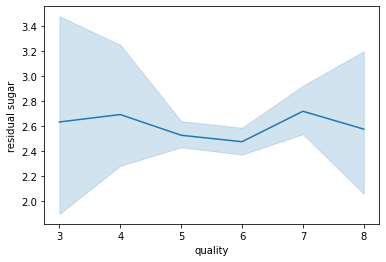

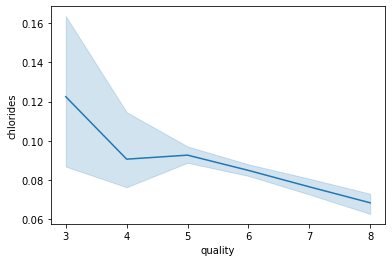

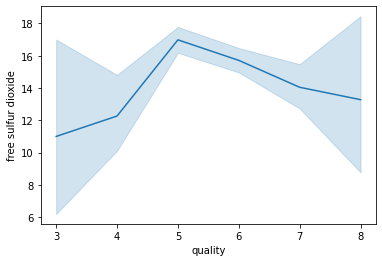

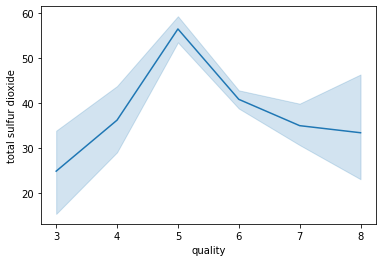

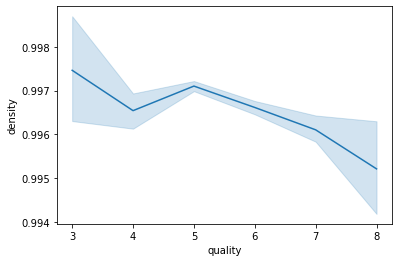

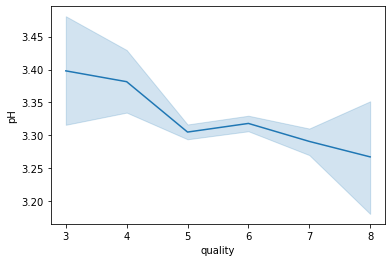

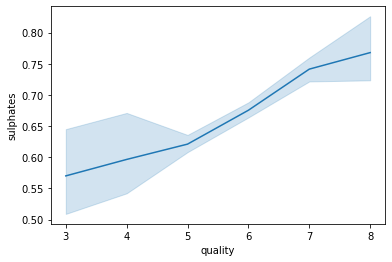

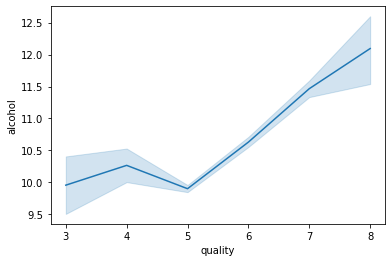

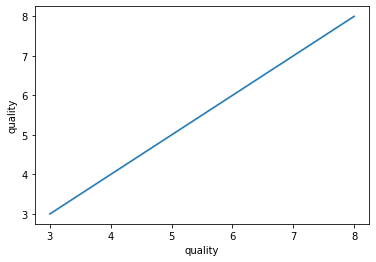

In [109]:
for i in df.columns:
    sns.lineplot(x='quality',y=i,data=df)
    plt.show()

As per the observations:
-Increase in 'citric acid', 'sulphates' and 'alcohol' increases the quality of wine.
-High range of 'volatile acidity' and 'chlorides' impact the quality of wine.
-Parameters like 'fixed acidity', 'chlorides' and 'free sulfur dioxide' does not create much impact on the quality of wine
-Parameters like 'residual sugar' and 'ph' has no impact on the overall quality of the wine. We can drop this column for model building.

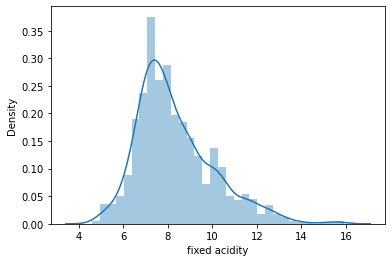

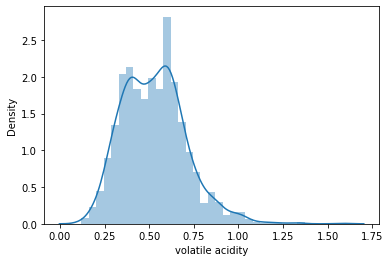

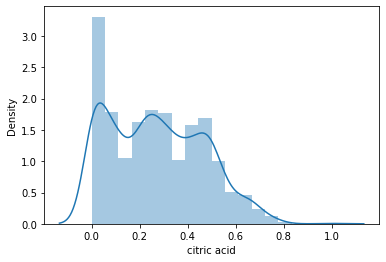

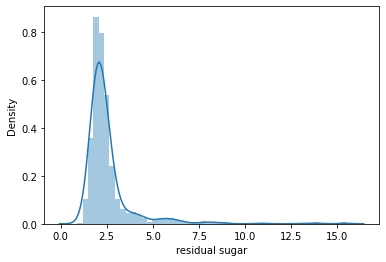

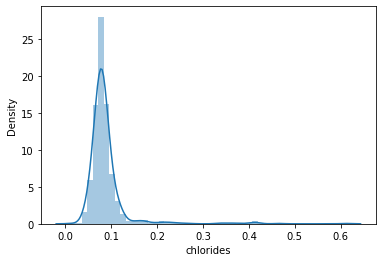

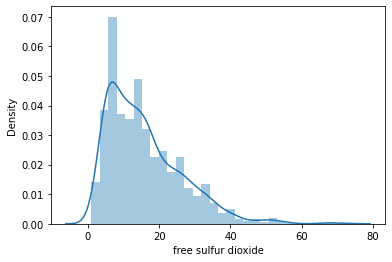

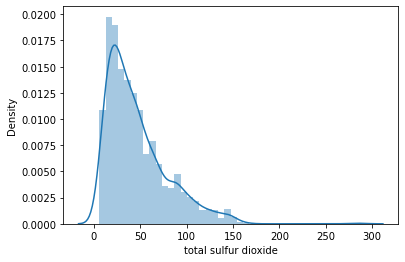

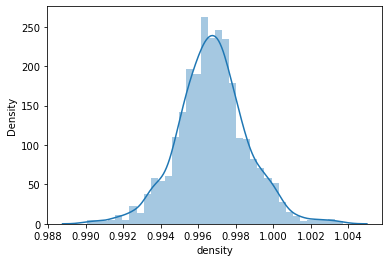

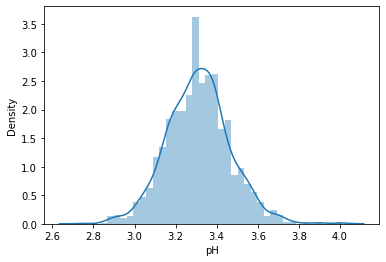

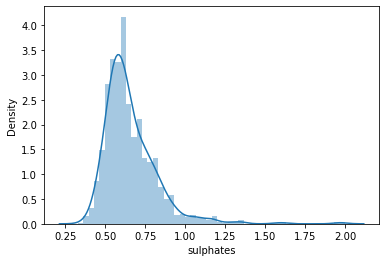

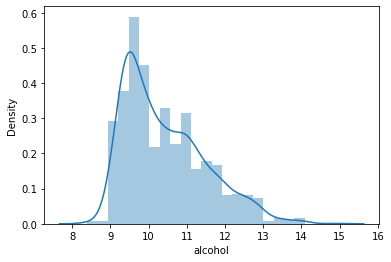

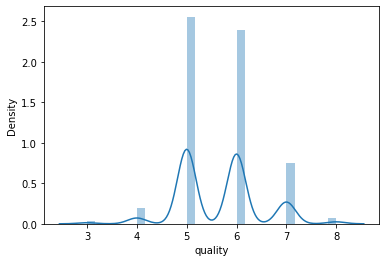

In [110]:
for i in df.columns:
    sns.distplot(df[i])
    plt.show()

'Parameters 'residual sugar' and 'chlorides' is right skewed.

<AxesSubplot:>

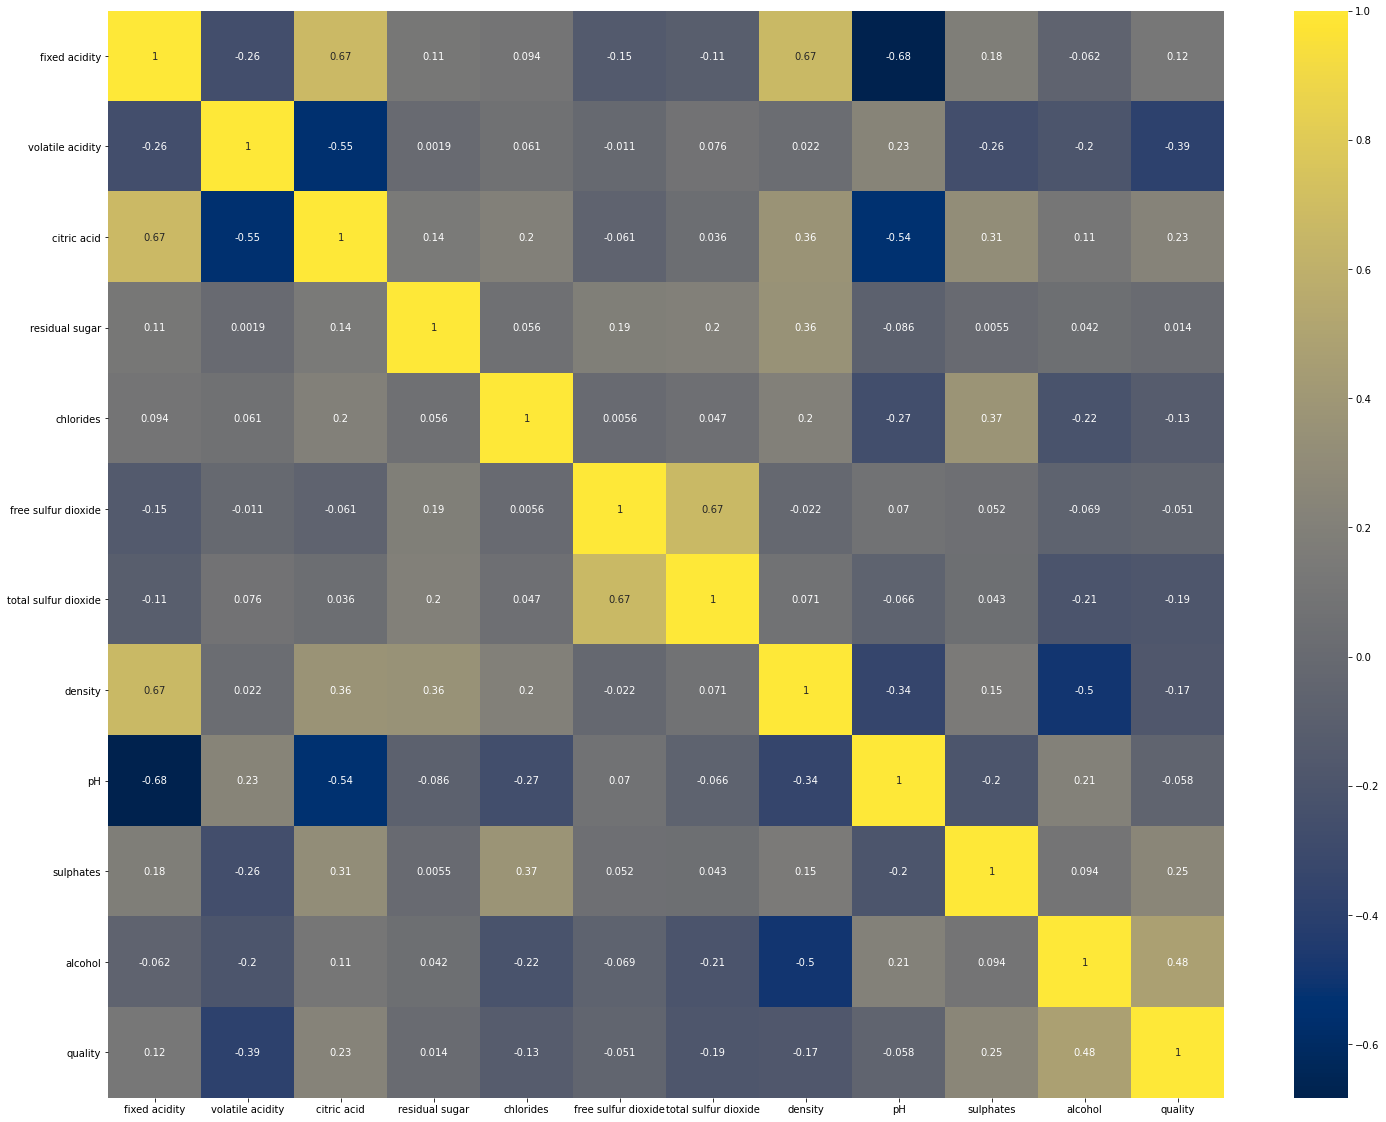

In [111]:
plt.figure(figsize=(25,20))
sns.heatmap(df.corr(), cmap='cividis',annot=True)

As observed ,none of the feature has corerlation above 0.70 with each other.

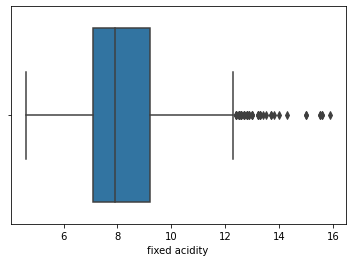

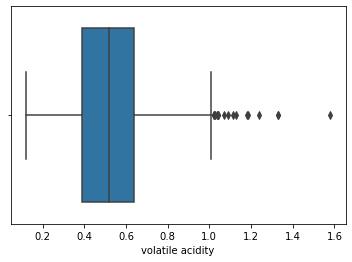

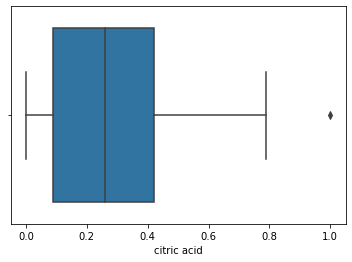

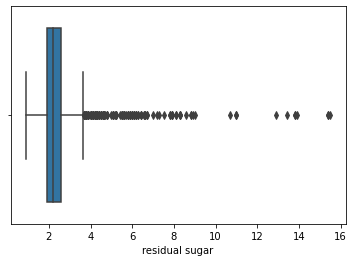

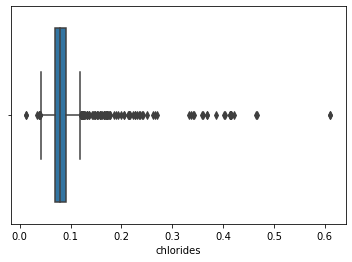

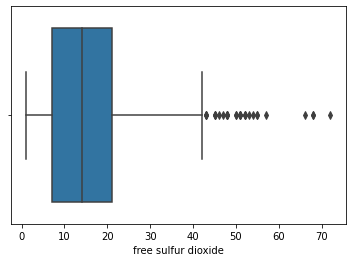

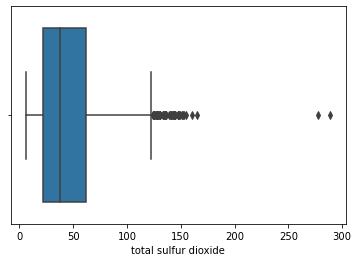

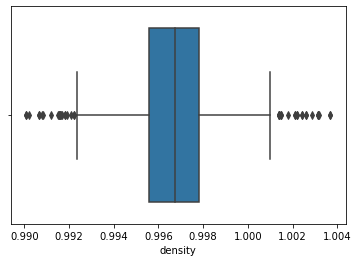

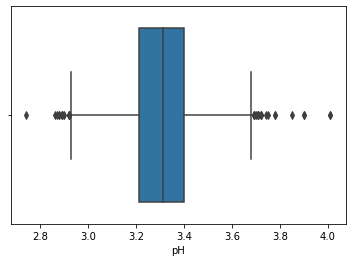

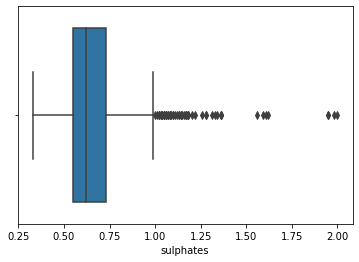

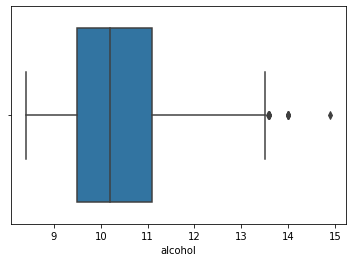

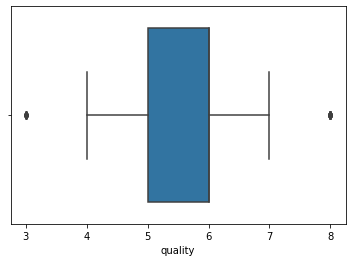

In [112]:
for i in df.columns:
    plt.subplots()
    sns.boxplot(df[i])

There are many outliers present in the data.Need to check for the outliers

Data Pre-processing

In [169]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
sulphates               2.428672
alcohol                 0.860829
quality                 2.129363
dtype: float64

Dropping the feature with less impact on quality of wine

In [114]:
df.drop(['residual sugar','pH'],axis=1,inplace=True)

In [115]:
df.head()

,fixed acidity,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,quality
0,7.4,0.70,0.00,0.076,11.0,34.0,0.9978,0.56,9.4,5
1,7.8,0.88,0.00,0.098,25.0,67.0,0.9968,0.68,9.8,5
2,7.8,0.76,0.04,0.092,15.0,54.0,0.9970,0.65,9.8,5
3,11.2,0.28,0.56,0.075,17.0,60.0,0.9980,0.58,9.8,6
4,7.4,0.70,0.00,0.076,11.0,34.0,0.9978,0.56,9.4,5


Columns has been reduced from 12 to 10

In [118]:
from scipy.stats import zscore

In [119]:
z=np.abs(zscore(df.drop(columns=['quality'])))
z

array([[0.52835961, 0.96187667, 1.39147228, ..., 0.55827446, 0.57920652,
        0.96024611],
       [0.29854743, 1.96744245, 1.39147228, ..., 0.02826077, 0.1289504 ,
        0.58477711],
       [0.29854743, 1.29706527, 1.18607043, ..., 0.13426351, 0.04808883,
        0.58477711],
       ...,
       [1.1603431 , 0.09955388, 0.72391627, ..., 0.53355375, 0.54204194,
        0.54162988],
       [1.39015528, 0.65462046, 0.77526673, ..., 0.67665745, 0.30598963,
        0.20930812],
       [1.33270223, 1.21684919, 1.02199944, ..., 0.66605717, 0.01092425,
        0.54162988]])

We are not removing outliers from the Quality as that is the categorical data we have converted

In [120]:
dfnew=df[(z<3).all(axis=1)]
dfnew

,fixed acidity,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,quality
0,7.4,0.700,0.00,0.076,11.0,34.0,0.99780,0.56,9.4,0
1,7.8,0.880,0.00,0.098,25.0,67.0,0.99680,0.68,9.8,0
2,7.8,0.760,0.04,0.092,15.0,54.0,0.99700,0.65,9.8,0
3,11.2,0.280,0.56,0.075,17.0,60.0,0.99800,0.58,9.8,0
4,7.4,0.700,0.00,0.076,11.0,34.0,0.99780,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,0.090,32.0,44.0,0.99490,0.58,10.5,0
1595,5.9,0.550,0.10,0.062,39.0,51.0,0.99512,0.76,11.2,0
1596,6.3,0.510,0.13,0.076,29.0,40.0,0.99574,0.75,11.0,0
1597,5.9,0.645,0.12,0.075,32.0,44.0,0.99547,0.71,10.2,0


In [121]:
100-((1483/1599)*100)

7.254534083802383

We have lost 7.25% of the data after removing the outliers, which is acceptable

Checking for skewness

In [122]:
dfnew.skew()

fixed acidity           0.793077
volatile acidity        0.385444
citric acid             0.304663
chlorides               2.270552
free sulfur dioxide     0.850137
total sulfur dioxide    1.156051
density                 0.043847
sulphates               0.903161
alcohol                 0.753694
quality                 2.114961
dtype: float64

Removing skewness using boxcox and cuberoot method

In [123]:
from scipy.stats import boxcox

In [124]:
ds=dfnew

Applying on chlorides

In [125]:
bc, var=boxcox(ds['chlorides'])

In [126]:
dfnew['chlorides'],var=boxcox(ds['chlorides'])

In [127]:
dfnew['chlorides'].skew()

-0.05648611333932027

In [128]:
dfnew.skew()

fixed acidity           0.793077
volatile acidity        0.385444
citric acid             0.304663
chlorides              -0.056486
free sulfur dioxide     0.850137
total sulfur dioxide    1.156051
density                 0.043847
sulphates               0.903161
alcohol                 0.753694
quality                 2.114961
dtype: float64

In [129]:
bc, var=boxcox(ds['total sulfur dioxide'])

<AxesSubplot:ylabel='Density'>

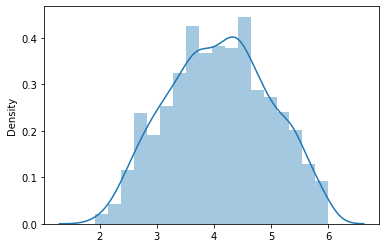

In [130]:
sns.distplot(bc)

After applying on total sulfur dioxide, it looks the skewness is removed

In [131]:
dfnew['total sulfur dioxide'],var=boxcox(ds['total sulfur dioxide'])

In [132]:
dfnew.skew()

fixed acidity           0.793077
volatile acidity        0.385444
citric acid             0.304663
chlorides              -0.056486
free sulfur dioxide     0.850137
total sulfur dioxide   -0.011942
density                 0.043847
sulphates               0.903161
alcohol                 0.753694
quality                 2.114961
dtype: float64

Applying the same method for the other features

In [133]:
ds=dfnew

In [134]:
columns=['fixed acidity','free sulfur dioxide','sulphates','alcohol']
 
for i in columns:
    ds[i]=np.cbrt(ds[i])

Splitting the data into input and output variable

In [135]:
x=ds.drop(columns='quality')
y=ds['quality']

In [136]:
x.head()

,fixed acidity,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol
0,1.948695,0.70,0.00,-4.225805,2.223980,4.021228,0.9978,0.824257,2.110454
1,1.983192,0.88,0.00,-3.616401,2.924018,4.920517,0.9968,0.879366,2.139975
2,1.983192,0.76,0.04,-3.762722,2.466212,4.629707,0.9970,0.866239,2.139975
3,2.237378,0.28,0.56,-4.259094,2.571282,4.771179,0.9980,0.833955,2.139975
4,1.948695,0.70,0.00,-4.225805,2.223980,4.021228,0.9978,0.824257,2.110454


In [137]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: quality, dtype: int32

In [138]:
y.value_counts()

0    1280
1     203
Name: quality, dtype: int64

Need to use oversampling technique to balance our data

In [139]:
pip install imblearn

In [140]:
from imblearn.over_sampling import SMOTE

In [141]:
SM=SMOTE()
X,Y=SM.fit_resample(x,y)

In [142]:
y_new=pd.DataFrame(data=Y)

In [143]:
y_new.value_counts()

quality
0          1280
1          1280
dtype: int64

The data is balanced.

In [144]:
x_new=pd.DataFrame(data=X)

In [145]:
x_new.head()

,fixed acidity,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol
0,1.948695,0.70,0.00,-4.225805,2.223980,4.021228,0.9978,0.824257,2.110454
1,1.983192,0.88,0.00,-3.616401,2.924018,4.920517,0.9968,0.879366,2.139975
2,1.983192,0.76,0.04,-3.762722,2.466212,4.629707,0.9970,0.866239,2.139975
3,2.237378,0.28,0.56,-4.259094,2.571282,4.771179,0.9980,0.833955,2.139975
4,1.948695,0.70,0.00,-4.225805,2.223980,4.021228,0.9978,0.824257,2.110454


Standardizing our dataset using StandardScaler

In [146]:
sc=StandardScaler()

In [147]:
sc_x=sc.fit_transform(x_new)

In [149]:
sc_x

array([[-0.66245923,  1.41187548, -1.66695253, ...,  0.75652437,
        -0.97520701, -1.40935262],
       [-0.39903782,  2.51258725, -1.66695253, ...,  0.18891166,
         0.0130583 , -1.00401338],
       [-0.39903782,  1.7787794 , -1.45701825, ...,  0.30243421,
        -0.22234462, -1.00401338],
       ...,
       [-0.3602456 , -0.75084265, -0.07507159, ..., -0.1653916 ,
         0.52008175, -0.4573441 ],
       [ 1.1559184 , -0.79736916,  1.54797046, ...,  1.39013387,
         0.42099267,  0.30673791],
       [ 0.09646444, -0.86149075,  0.46171777, ...,  0.11754074,
         1.29710508,  1.35972287]])

ModelBuilding

Libraries imported and checking the best possible random state to train our model. Using KNeighborsClassiifer to check and then later will run with other models

In [150]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(sc_x,y_new,test_size=.30,random_state=i)
    mod=KNeighborsClassifier(n_neighbors=5)
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best Accuracy is',maxAccu,' on Random state',maxRS)

Best Accuracy is 0.9166666666666666  on Random state 49


the best random state is 164

In [151]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=164)

In [152]:
lg=LogisticRegression()
rfc=RandomForestClassifier(n_estimators=100)
dt=DecisionTreeClassifier()
sv=SVC(probability=True)
knn=KNeighborsClassifier(n_neighbors=5)

In [153]:
model=(lg,rfc,dt,sv,knn)
for m in model:
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    print('Accuracy score of',m)
    print(accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))

Accuracy score of LogisticRegression()
0.8831460674157303
[[387   5]
 [ 47   6]]
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       392
           1       0.55      0.11      0.19        53

    accuracy                           0.88       445
   macro avg       0.72      0.55      0.56       445
weighted avg       0.85      0.88      0.85       445

Accuracy score of RandomForestClassifier()
0.9258426966292135
[[381  11]
 [ 22  31]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       392
           1       0.74      0.58      0.65        53

    accuracy                           0.93       445
   macro avg       0.84      0.78      0.81       445
weighted avg       0.92      0.93      0.92       445

Accuracy score of DecisionTreeClassifier()
0.8741573033707866
[[358  34]
 [ 22  31]]
              precision    recall  f1-score   support

           0       0.94      0.91      0

Best accuracy is by RandomForestClassifier(RFC) model - Accuracy:92%.Verifying if the our model is overfitting or underfitting. For that we have to use Crosss validation.

In [154]:
from sklearn.model_selection import cross_val_score

In [155]:
model=(lg,rfc,dt,sv,knn)
for m in model:
    score=cross_val_score(m,x,y,cv=5)
    print('Mean Accuracy of', m)
    print(score.mean())
    print('\n')

Mean Accuracy of LogisticRegression()
0.8698584948584948


Mean Accuracy of RandomForestClassifier()
0.8765834015834016


Mean Accuracy of DecisionTreeClassifier()
0.8225953225953226


Mean Accuracy of SVC(probability=True)
0.8631176631176631


Mean Accuracy of KNeighborsClassifier()
0.8368277368277368




On cross validation RFC model gave best result of 87.86% accuracy

checking on all the model performance on Test accuracy and cross validation+

In [156]:
Report={'Model':['LogisticR','RFC','DTC','SVC','KNN'],
        'Acc_test':[0.88,0.92,0.85,0.88,0.85],
        'Acc_cross':[0.86,0.87,0.81,0.86,0.83],
        'Difference':[0.88-0.86,0.92-0.87,0.85-0.81,0.88-0.86,0.85-0.83],}

In [157]:
Accuracy=pd.DataFrame(data=Report)

In [158]:
Accuracy

,Model,Acc_test,Acc_cross,Difference
0,LogisticR,0.88,0.86,0.02
1,RFC,0.92,0.87,0.05
2,DTC,0.85,0.81,0.04
3,SVC,0.88,0.86,0.02
4,KNN,0.85,0.83,0.02


HyperTuning of the model (RFC)

In [161]:
parameters={'n_estimators':[100,250,500],'criterion':['gini','entropy'],'max_depth':np.arange(2,10)}

In [162]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=3)

Training the model

In [173]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'n_estimators': [100, 250, 500]})

In [174]:
GCV.best_params_

{'criterion': 'gini', 'max_depth': 9, 'n_estimators': 250}

In [175]:
Finalmod=RandomForestClassifier(n_estimators=250, max_depth=9, criterion='gini')
Finalmod.fit(x_train,y_train)
pred=Finalmod.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

92.35955056179776


The model has given us the 92% accuracy.

Checking the AUC score with this model

In [176]:
y_pred_prob=Finalmod.predict_proba(x_test)[:,1]    
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
auc_score=roc_auc_score(y_test,Finalmod.predict(x_test))
print('AUC Score of', Finalmod)
print(auc_score)

AUC Score of RandomForestClassifier(max_depth=9, n_estimators=250)
0.7689882556796303


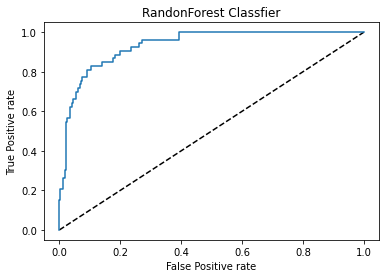

In [177]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Random Forest Classiifer')
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('RandonForest Classfier')
plt.show()

We obtained the accuracy of 92% with ROC_AUC score of 76%
Saving the project

the accuracy of 92% with ROC_AUC score of 76%

In [178]:
import joblib
joblib.dump(Finalmod,'Red_wine_quality.obj')

['Red_wine_quality.obj']